# Example: Customer complaints

> Dataset https://www.kaggle.com/dushyantv/consumer_complaints

In [13]:
data_path = "data/Consumer_Complaints.csv"

In [14]:
import pandas as pd

df = pd.read_csv(data_path, on_bad_lines="skip")
df.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN


In [15]:
df.shape

(1025010, 19)

In [16]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1025010 non-null  object 
 1   Product                       1025010 non-null  object 
 2   Sub-product                   789840 non-null   object 
 3   Issue                         1025010 non-null  object 
 4   Sub-issue                     528853 non-null   object 
 5   Consumer Complaint            277814 non-null   object 
 6   Company Public Response       318364 non-null   object 
 7   Company                       1025010 non-null  object 
 8   State                         1012650 non-null  object 
 9   ZIP code                      1008292 non-null  object 
 10  Tags                          141588 non-null   object 
 11  Consumer consent provided?    491911 non-null   object 
 12  Submitted via               

In [17]:
col = ['Product', 'Consumer Complaint']
df = df[col]

In [18]:
df.head()

,Product,Consumer Complaint
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


In [19]:
len(df['Product'].unique())

18

In [20]:
df['Product'].unique()

array(['Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card',
       'Debt collection', 'Student loan', 'Bank account or service',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Virtual currency'],
      dtype=object)

In [21]:
df = df[pd.notnull(df['Consumer Complaint'])]
df.columns = ['product', 'consumer_complaint']
df['category_id'] = df['product'].factorize()[0]

category_id_df = df[['product', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)
df.head()

,product,consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [23]:
df.shape

(277814, 3)

In [24]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277814 entries, 1 to 1025009
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product             277814 non-null  object
 1   consumer_complaint  277814 non-null  object
 2   category_id         277814 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 325.3 MB


In [25]:
df = df.sample(frac=0.05, random_state=0)

In [26]:
df.shape

(13891, 3)

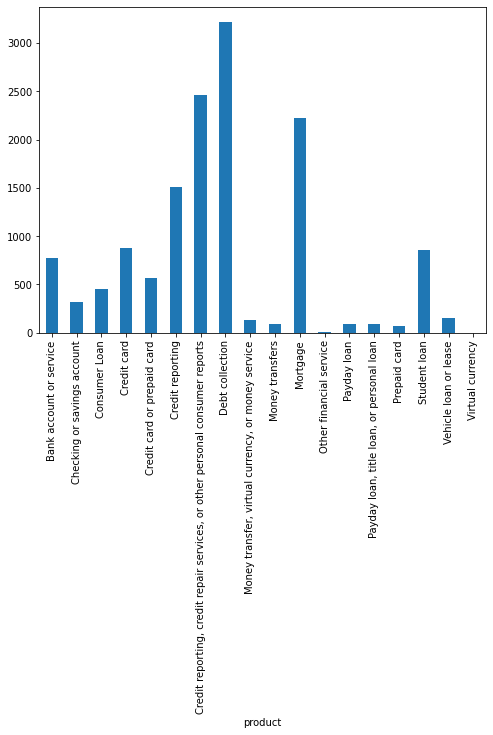

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

df.groupby('product')['consumer_complaint'].count().plot.bar(ylim=0)
plt.show()

**Text Representation**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=20, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df["consumer_complaint"]).toarray()

In [29]:
labels = df["category_id"]

features.shape

(13891, 8467)

In [30]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. checking account
. overdraft fees
# 'Checking or savings account':
  . Most correlated unigrams:
. atm
. branch
  . Most correlated bigrams:
. direct deposits
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. auto loan
. vehicle xxxx
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. report equifax
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. equifax
. inquiries
  . Most correlated bigrams:
. data breach
. credit report

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['consumer_complaint'], df['product'], random_state = 0)

tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)

In [32]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [33]:
print(clf.predict(tfidf_vect.transform(["""This company refuses to provide me verification and validation of 
                                         debt per my right under the FDCPA. 
                                         I do not believe this debt is mine."""])))

['Debt collection']


In [34]:
X_test_tfidf = tfidf_vect.transform(X_test)

clf.score(X_test_tfidf, y_test)

0.48603512813129857

In [36]:
y_pred = clf.predict(X_test_tfidf)

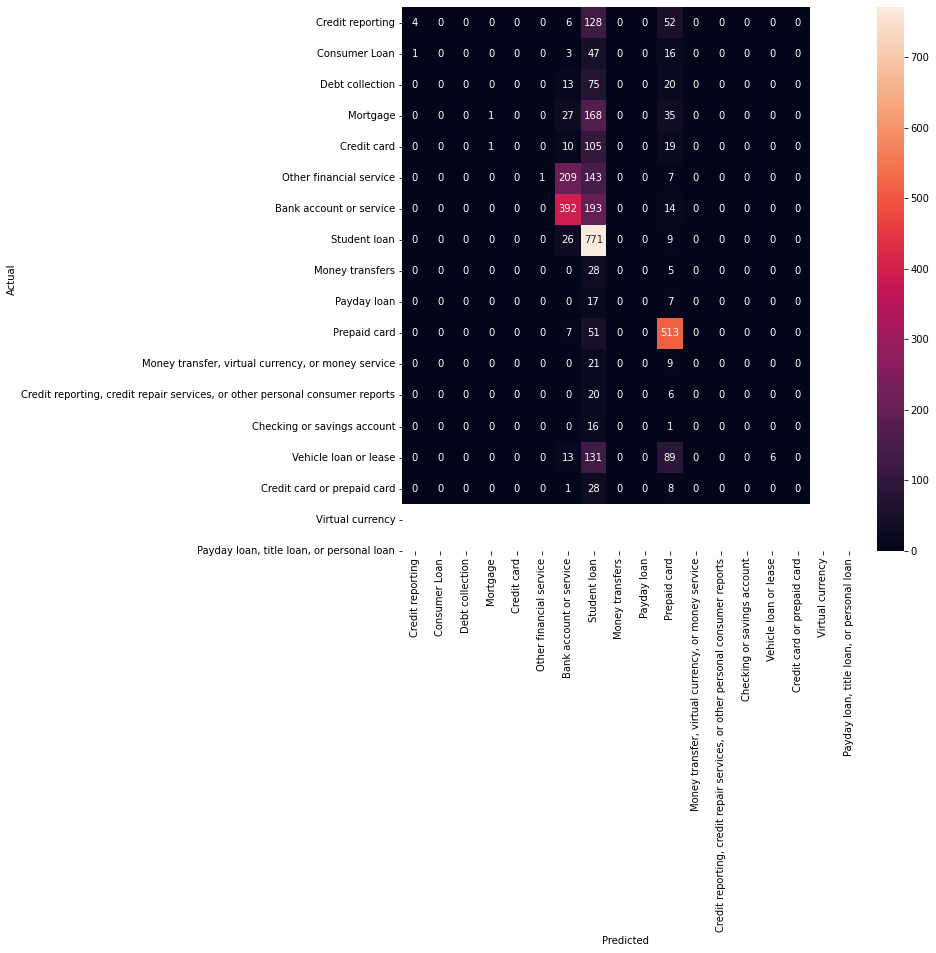

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df["product"].values, yticklabels=category_id_df["product"].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()